# Name heuristic

1948793 1161324 3110117
605574 468990 392491


/opt/conda/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


<IPython.core.display.Javascript object>


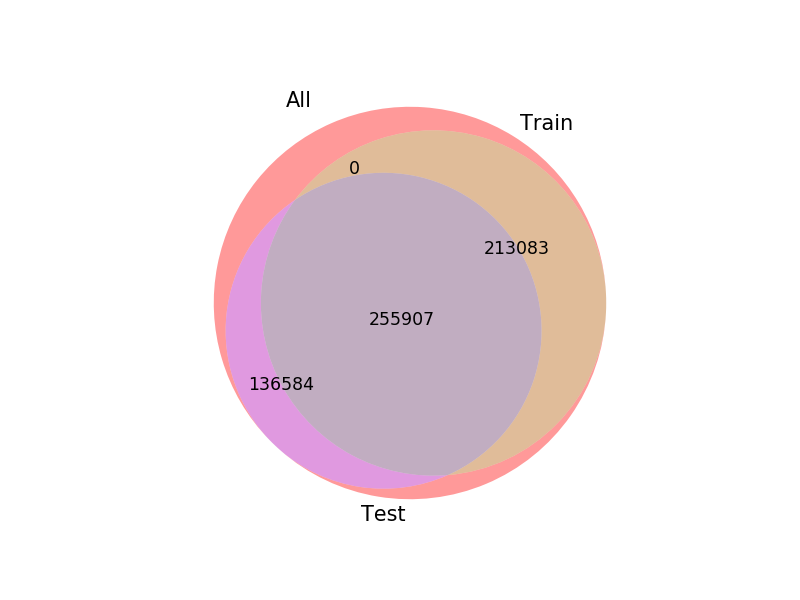

In [1]:
# !pip install editdistance
%matplotlib notebook
import editdistance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from sklearn.feature_extraction.text import CountVectorizer

train_df = pd.read_csv('../data/proc_train.csv')
pred_df = pd.read_csv('predictions/stack_v1_full.csv')

clean_names = []

# only non-nonsense queries
l1 = list(train_df[train_df.target.isin([0,1])].fullname_true)
# only "clean queries"
l2 = list(pred_df[pred_df.target==0].fullname_true)

clean_names.extend(l1)
clean_names.extend(l2)
print(len(l1),len(l2),len(clean_names))

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(clean_names)

vocab = cv.vocabulary_

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(l1)

vocab_train = cv.vocabulary_

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(l2)

vocab_test = cv.vocabulary_

print(len(vocab),len(vocab_train),len(vocab_test))

venn3([set(vocab.keys()),
       set(vocab_train.keys()),
       set(vocab_test.keys())], ('All', 'Train', 'Test'))

In [2]:
def count_new_words(text):
    global vocab
    new_words = 0
    words = text.split()
    
    for word in words:
        if word not in vocab:
            new_words += 1
            
    return new_words

pred_df['new_words'] = pred_df['fullname_true'].apply(lambda x: count_new_words(x))

In [3]:
cond = (pred_df.target==1)
pred_df[cond].new_words.value_counts()

0    1336744
1     193537
2      13899
3        829
4         11
5          1
Name: new_words, dtype: int64

In [4]:
cond = (pred_df.target==0)
pred_df[cond].new_words.value_counts()

0    1153927
1       6923
2        451
3         21
4          2
Name: new_words, dtype: int64

In [5]:
vocab_list = list(vocab.keys())
cond = (pred_df.target==1)&(pred_df.new_words>0)
vocab_list_len = [len(_) for _ in vocab_list]

vocab_list_len = np.array(vocab_list_len)
vocab_arr = np.array(vocab_list)

phrase = pred_df[cond].sample(n=1).fullname_true.values[0]

words = phrase.split()

print(phrase)

for word in words:
    if word not in vocab:
        print(word)
        similar_vocab = vocab_arr[(vocab_list_len>len(word)-1)*(vocab_list_len<len(word)+1)]
        distances = [editdistance.eval(name,word) for name in similar_vocab]
        idx = np.argsort(np.array(distances))[:5]
        print(similar_vocab[idx[0]],
              similar_vocab[idx[1]],
              similar_vocab[idx[2]],
              similar_vocab[idx[3]])

САЛИМОВ ШАМСУЛЛОЧОН СУНАТИЛЛОЕВИЧ
ШАМСУЛЛОЧОН
ХАМДУЛЛОЧОН ШАЙДУЛЛОХОН САЙФУЛЛОЧОН БАЗМУЛЛОЧОН
